In [1]:
# posterior plots
import sys
sys.path.append('../../')
from fig1_calibration import create_sim as cs
import pandas as pd
import sciris as sc
from matplotlib import rc
from scipy.stats import qmc
import matplotlib.pyplot as plt
#%config InlineBackend.figure_formats = ['svg']
rc('font', **{'family': 'serif', 'serif': ['Times']})
rc('text', usetex=False)
rc('grid', linestyle="--", color='black')


bounds = cs.define_pars(which='bounds',use_safegraph=True)
bounds['tn'][0] = 5.0
start_day = pd.to_datetime('2020-01-27')

Covasim 2.1.2 (2021-03-31) — © 2021 by IDM


In [5]:
sims = pd.read_csv('../data/sims_combined-posterior.csv')
df = sims.copy()

In [3]:
import numpy as np
qs = [0.025,0.975,0.5,0.25,0.75] 
cols = ['cum_diagnoses','cum_deaths','diagnoses','death','infectious']
df_plot = (
    df.groupby('t')
    [cols].quantile(qs)
.reset_index()
.pivot(index='t',
columns=['level_1'],
values=cols
))
df_plot

cum_diagnoses                                                        \
level_1         0.025        0.250        0.500         0.750         0.975   
t                                                                             
0            0.000000     0.000000     0.000000      0.000000      0.000000   
1            0.000000     0.000000     0.000000      0.000000      0.000000   
2            0.000000     0.000000     0.000000      0.000000      0.000000   
3            0.000000     0.000000     0.000000      0.000000      0.000000   
4            0.000000     0.000000     0.000000      0.000000      0.000000   
..                ...          ...          ...           ...           ...   
129       6494.722715  8567.837926  9324.552514  10212.203615  11283.086044   
130       6517.413731  8607.387124  9364.552514  10267.203615  11299.836044   
131       6527.751880  8622.387124  9384.552514  10309.703615  11345.336044   
132       6536.075311  8624.887124  9404.552514  10317.203615  11376.336044   
133       6564.810482  8696.598220  9484.552514  10377.203615  11434.336044   

         cum_deaths                                                  ...  \
level_1       0.025       0.250       0.500       0.750       0.975  ...   
t                                                                    ...   
0          0.000000    0.000000    0.000000    0.000000    0.000000  ...   
1          0.000000    0.000000    0.000000    0.000000    0.000000  ...   
2          0.000000    0.000000    0.000000    0.000000    0.000000  ...   
3          0.000000    0.000000    0.000000    0.000000    0.000000  ...   
4          0.000000    0.000000    0.000000    0.000000    0.000000  ...   
..              ...         ...         ...         ...         ...  ...   
129      395.589585  498.639381  621.658254  706.736386  838.245897  ...   
130      397.418114  503.867086  621.658254  716.736386  839.367836  ...   
131      397.418114  505.216602  629.213007  723.089413  848.245897  ...   
132      412.079448  506.367086  634.213007  747.088360  851.617836  ...   
133      412.079448  506.367086  634.213007  753.633549  859.367836  ...   

        death                                            infectious  \
level_1 0.025     0.250     0.500     0.750      0.975        0.025   
t                                                                     
0         0.0  0.000000  0.000000  0.000000   0.000000     0.000000   
1         0.0  0.000000  0.000000  0.000000   0.000000     0.000000   
2         0.0  0.000000  0.000000  0.000000   0.000000     0.000000   
3         0.0  0.000000  0.000000  0.000000   0.000000     0.000000   
4         0.0  0.000000  0.000000  0.000000   0.000000     0.000000   
..        ...       ...       ...       ...        ...          ...   
129       0.0  1.428571  4.285714  5.714286  11.107143  2687.634644   
130       0.0  1.711022  4.285714  5.714286  10.000000  2634.530551   
131       0.0  2.857143  4.285714  5.714286   8.547278  2585.937212   
132       0.0  2.857143  2.857143  5.644519  12.214286  2532.321429   
133       0.0  2.824943  2.857143  4.908987  11.414081  2414.678571   

                                                             
level_1        0.250        0.500        0.750        0.975  
t                                                            
0           0.000000     0.000000     0.000000     0.000000  
1           0.000000     0.000000     0.000000     0.000000  
2           0.000000     0.000000     0.000000     0.000000  
3           0.000000     0.000000     0.000000     0.000000  
4           0.000000     0.000000     0.000000     0.000000  
..               ...          ...          ...          ...  
129      3391.785714  3878.571429  4354.285714  5728.678571  
130      3281.785714  3776.428571  4246.785714  5609.857143  
131      3186.785714  3658.571429  4148.571429  5497.571429  
132      3132.857143  3580.000000  4078.571429  5387.285714  
133      3075.000000  3523.571429  

/var/folders/57/mtbtcc0x2b9_rpy9_8q09x040000gq/T/ipykernel_20173/3311096537.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


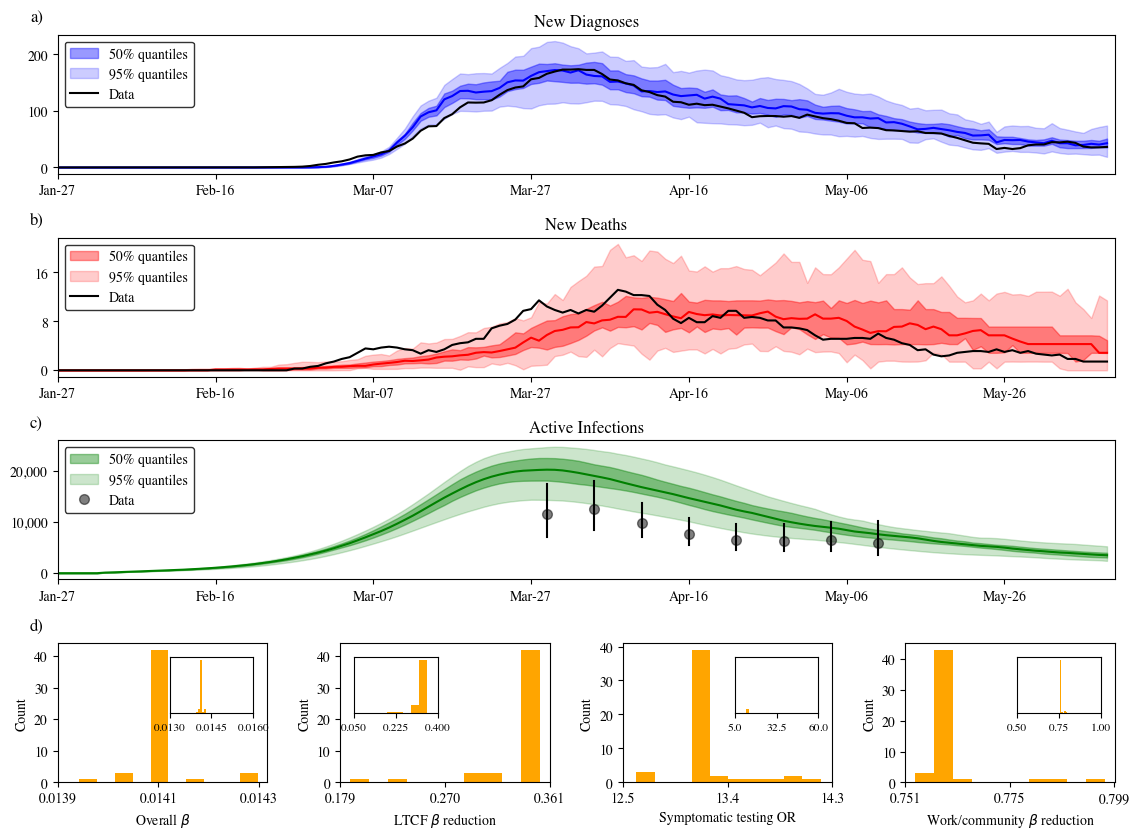

In [ ]:
# plot posterior
import matplotlib.ticker as ticker
import datetime as dt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplot_mosaic(mosaic=[['a']*4,
                                     ['b']*4,
                                     ['c']*4,
                                     ['d','e','f','g']],figsize=(11.5,8.5))
colors = ['blue','red','green']
n_days = sims[sims['rand_seed']==sims['rand_seed'].min()].shape[0]
def format_ax(ax):
    ''' Format the axes nicely '''
    @ticker.FuncFormatter
    def date_formatter(x, pos):
        return (start_day + dt.timedelta(days=x)).strftime('%b-%d')
    ax.xaxis.set_major_formatter(date_formatter)
    ax.set_xlim([0, n_days])
    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    return
outputs = {'diagnoses':'New Diagnoses',
           'death': 'New Deaths',
           'infectious': 'Active Infections'}
letters = ['a','b','c']
for i, k in enumerate(outputs.keys()):
    l = letters[i]
    ax[l].plot(df_plot[k][0.500],color=colors[i])
    ax[l].fill_between(df_plot.index,
                        df_plot[k][0.250],
                        df_plot[k][0.750],
                        color=colors[i],
                        alpha=0.4,
                        label='50% quantiles')
    ax[l].fill_between(df_plot.index,
                        df_plot[k][0.025],
                        df_plot[k][0.9750],
                        color=colors[i],
                        alpha=0.2,
                        label='95% quantiles')
    if k != 'infectious':
        data_x = df_plot.index
        data_y = df[f"{k}_data"].values[0:len(data_x)]
        ax[l].plot(
        data_x,
        data_y,
        color='black',
        label='Data')
        ax[l].legend(edgecolor='black',loc='upper left')
        ax[l].set_title(outputs[k])
        format_ax(ax[l])

# handle infectious data
pop_size = 2.25e6
scan_file = '../../inputs/scanprev_5_21.csv'
scan = pd.read_csv(scan_file)
date_offset = pd.to_datetime([start_day for _ in range(len(scan))])
scan['since'] = pd.to_datetime(scan['to']) - date_offset
scan['to'] = pd.to_datetime(scan['to']) - date_offset

scan[['since','to']].mean(axis=1)
for i,r in scan.iterrows():
    label = "Data" if i==0 else None
    ts = np.mean([r['since'].days, r['to'].days])
    low  = r['lower']*pop_size
    high = r['upper']*pop_size
    mean = r['mean']*pop_size
    ax['c'].plot([ts]*2, [low, high], alpha=1.0, color='k', zorder=1000)
    ax['c'].plot(ts, mean, 'o', markersize=7, color='k', alpha=0.5, label=label, zorder=1000)
ax['c'].set_title('Active Infections')
format_ax(ax['c'])
ax['c'].legend(edgecolor='black',loc='upper left')


# plot posterior
posterior = pd.read_csv('./posterior-samples.csv')[list(bounds.keys())]
new_letters = ['d','e','f','g']
mapping = sc.objdict({
    'beta'  : r'Overall $\beta$',
    'bc_wc1': r'Work/community $\beta$ reduction',
    'bc_lf' : r'LTCF $\beta$ reduction',
    'tn'   : 'Symptomatic testing OR',
    })
keys = list(bounds.keys())
lb = [bounds[k][0] for k in keys]
ub = [bounds[k][1] for k in keys]

# Insets
def adjust_xticks(ax):
    l, u = ax.get_xlim()
    xticks = np.linspace(l,u,3)
    xticks = np.array([np.format_float_positional(
        x, precision=3,
        unique=False, fractional=False, trim='k'
    ) for x in xticks]).astype(np.float64)
    ax.set_xticks(xticks)

inset_positions = {'beta':'upper right','bc_wc1':'upper right',
'tn':'upper right','bc_lf':'upper left'}
for i, key in enumerate(posterior.columns.tolist()):
    l = new_letters[i]
    # add inset (showing smaller version of support)
    axins = inset_axes(
        ax[l],
        width="40%",height="40%",loc=inset_positions[key],borderpad=1
    )
    posterior[key].hist(ax=axins,color='orange',grid=False,bins=5)
    # full range
    axins.set_xlim(bounds[key])
    axins.tick_params(axis='x',labelsize='small')

    # posterior support
    posterior[key].hist(ax=ax[l],color='orange',grid=False,bins=10)
    ax[l].set_xlabel(mapping[key])
    ax[l].set_ylabel('Count')
    # remove y labels
    axins.yaxis.set_visible(False)
    # adjust ticks
    adjust_xticks(ax[l])
    adjust_xticks(axins)
    
    
# label subplots
from matplotlib.transforms import ScaledTranslation
def add_fig_labels(position,label):
    ax[position].text(
        0.0, 1.0, label, transform=(
            ax[position].transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='large', va='bottom', fontfamily='serif')
    

add_fig_labels('a','a)')
add_fig_labels('b','b)')
add_fig_labels('c','c)')
add_fig_labels('d','d)')

fig.tight_layout()
fig.savefig('../figs/posterior-samples-w-insets.pdf')

In [ ]:
# compare ttq and ABC results
## errors
ttq_mae = pd.read_csv('../../fig1_calibration/sim_mae.csv')
output_cols = ['cum_diagnoses','cum_deaths','diagnoses','death']
for col in output_cols:
    sims[col+'_mae'] = np.abs(sims[col] - sims[col+'_data'])
mae_cols = [col for col in sims.columns if col.endswith('_mae')]
abc_mae = (sims.groupby('rand_seed')[mae_cols].mean()).reset_index()
abc_mae[['diagnoses_mae','death_mae']].describe()



,diagnoses_mae,death_mae
count,50.000000,50.000000
mean,12.872706,2.429958
std,5.185892,0.663162
min,6.604753,1.236087
25%,9.028037,1.929983
50%,11.070676,2.364560
75%,16.623028,2.919050
max,29.679248,4.043109


In [ ]:
ttq_mae[['diagnoses_mae','deaths_mae']].describe()

,diagnoses_mae,deaths_mae
count,200.000000,200.000000
mean,8.582925,1.405250
std,1.725751,0.209196
min,5.150595,0.839625
25%,7.468181,1.252701
50%,8.288229,1.400411
75%,9.560885,1.539638
max,15.031238,2.171028


In [6]:
# sensitivity
(sims.query('t>30')
.groupby('rand_seed')[mae_cols].mean()
).reset_index()[['diagnoses_mae','death_mae']].describe()


,diagnoses_mae,death_mae
count,50.000000,50.000000
mean,16.718527,3.139307
std,6.746106,0.863900
min,8.562078,1.584534
25%,11.714700,2.496982
50%,14.372807,3.058448
75%,21.600763,3.776379
max,38.581324,5.221132


In [6]:
# correlations
def get_corr(sims,col,summarise=True):
    sim_corrs = (sims
    .groupby('rand_seed')[
        [col,f'{col}_data']
    ].corr().reset_index()).drop_duplicates(subset=['rand_seed'],keep='first')
    if summarise:
        return sim_corrs[f'{col}_data'].describe().to_frame()
    else:
        return sim_corrs[f'{col}_data'].to_frame()
df_corr = pd.concat([get_corr(sims,'diagnoses'),get_corr(sims,'death')],axis=1)
df_corr




,diagnoses_data,death_data
count,50.000000,50.000000
mean,0.975980,0.682177
std,0.010409,0.133379
min,0.942642,0.367197
25%,0.972317,0.588347
50%,0.978187,0.693477
75%,0.983523,0.781177
max,0.992859,0.925037


In [10]:
ttq_sims = (pd.read_csv('../../fig1_calibration/sim_results.csv')
            .rename({'index':'rand_seed','deaths':'death','deaths_data':'death_data'},axis='columns')
)

ttq_corrs = pd.concat([get_corr(ttq_sims,'diagnoses'),get_corr(ttq_sims,'death')],axis=1)
ttq_corrs

,diagnoses_data,death_data
count,200.000000,200.000000
mean,0.976735,0.874729
std,0.008332,0.038242
min,0.946284,0.761884
25%,0.972390,0.848497
50%,0.978225,0.883189
75%,0.982911,0.903198
max,0.993692,0.964285


In [8]:
ttq_sims

,cum_diagnoses,cum_deaths,diagnoses,deaths,cum_diagnoses_data,cum_deaths_data,diagnoses_data,deaths_data,t,index,cum_diagnoses_mse,cum_deaths_mse,diagnoses_mse,deaths_mse
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1,0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2,0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,3,0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,8439.136605,600.807910,42.213140,3.837558,8482.0,584.0,43.428571,1.857143,129,199,1837.270646,282.505835,1.477273,3.922045
26796,8483.908117,600.807910,37.096396,3.837558,8517.0,585.0,36.857143,1.428571,130,199,1095.072721,249.890015,0.057242,5.803217
26797,8537.633932,600.807910,37.096396,3.837558,8536.0,586.0,35.428571,1.428571,131,199,2.669732,219.274195,2.781638,5.803217
26798,8546.588234,600.807910,37.096396,1.279186,8548.0,588.0,35.571429,1.428571,132,199,1.993083,164.042556,2.325525,0.022316


In [48]:
sims.groupby('rand_seed').tail(1)[['cum_deaths','cum_deaths_data']].describe()

,cum_deaths,cum_deaths_data
count,50.000000,50.0
mean,631.995583,590.0
std,142.518282,0.0
min,365.207646,590.0
25%,506.367086,590.0
50%,634.213007,590.0
75%,753.633549,590.0
max,934.275959,590.0


In [ ]:
# age hists
import matplotlib.pylab as pl
import covasim as cv
import numpy as np
agehists = []
full_sims = cv.load('../posterior/posterior.sims')
fig, ax = plt.subplots(ncols=2,figsize=(6,4))

for s,sim in enumerate(full_sims.sims):
    agehist = sim['analyzers'][0]
    if s == 0:
        age_data = agehist.data
    agehists.append(agehist.hists[-1])

# Observed data
x = age_data['age'].values
pos = age_data['cum_diagnoses'].values
death = age_data['cum_deaths'].values

# Model outputs
mposlist = []
mdeathlist = []
for hists in agehists:
    mposlist.append(hists['diagnosed'])
    mdeathlist.append(hists['dead'])
mposarr = np.array(mposlist)
mdeatharr = np.array(mdeathlist)

low_q = 0.025
high_q = 0.975
mpbest = pl.median(mposarr, axis=0)
mplow  = pl.quantile(mposarr, q=low_q, axis=0)
mphigh = pl.quantile(mposarr, q=high_q, axis=0)
mdbest = pl.median(mdeatharr, axis=0)
mdlow  = pl.quantile(mdeatharr, q=low_q, axis=0)
mdhigh = pl.quantile(mdeatharr, q=high_q, axis=0)

w = 4
off = 2

# Insets
x0s, y0s, dxs, dys = 0.25, 0.3, 0.2, 0.4

c1 = [0.3,0.3,0.6]
c2 = [0.6,0.7,0.9]
xx = x+w-off
ax[0].bar(x-off,pos, width=w, label='Data', facecolor=c1)
ax[0].bar(xx, mpbest, width=w, label='Model', facecolor=c2)
for i,ix in enumerate(xx):
    ax[0].plot([ix,ix], [mplow[i], mphigh[i]], c='k')
ax[0].set_xticks(np.arange(0,81,20))
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Cases')
sc.boxoff(ax[0])
ax[0].legend(edgecolor='black',loc='upper left')


c1 = [0.5,0.0,0.0]
c2 = [0.9,0.4,0.3]
ax[1].bar(x-off,death, width=w, label='Data', facecolor=c1)
ax[1].bar(x+w-off, mdbest, width=w, label='Model', facecolor=c2)
for i,ix in enumerate(xx):
    ax[1].plot([ix,ix], [mdlow[i], mdhigh[i]], c='k')
ax[1].set_xticks(np.arange(0,81,20))
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Deaths')
sc.boxoff(ax[1])
ax[1].legend(edgecolor='black',loc='upper left')
sc.boxoff(ax[1])


fig.savefig('../figs/Supp/Age-Hists.pdf')

In [ ]:
# MCMC Chains
import arviz as az
mcmc_titles = {'diagnoses':'Diagnoses','death':'Deaths'}
for output in ['diagnoses','death']:
    mcmc = sc.load(f'../posterior/calibrated-{output}-full.pkl')
    az.plot_trace(mcmc,compact=True,figsize=(9,6),
              legend=True,chain_prop='color')
    plt.suptitle(mcmc_titles[output])
    plt.tight_layout()
    plt.savefig(f'../figs/Supp/MCMC_{output}.pdf')


In [ ]:
# make posterior in json form
import json
keys = list(bounds.keys())
posterior_json = sims[keys + ['rand_seed']].drop_duplicates()
posterior_json['index'] = posterior_json['rand_seed'].values
posterior_json['mismatch'] = np.nan
records = posterior_json.to_dict(orient='records')

parkeys = keys + ['rand_seed']
js_list = []
for record in records:
    js_list.append({'pars':{key:record[key] for key in parkeys},
                    'index':record['index'],
                    'mismatch':record['mismatch']})
with open("../posterior/abc_pars.json", "w") as outfile:
    # Write the JSON data to the file
    json.dump(js_list, outfile)